# Analysis of Three Local Peace Agreement Properties
## Description

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("pax_local_all_agreements_data.csv")
data

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
0,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1210,1,Decisions on Mostar of 12 February 1997,1997-02-12,Multiparty signed/agreed,...,1,0,0,0,1,0,0,1,0,1
1,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1644,1,Agreement on the disarmament of the able-bodie...,1995-07-24,Multiparty signed/agreed,...,0,0,0,1,1,1,0,0,0,0
2,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,125,Bosnia peace process,Europe and Eurasia,1850,1,Agreement,1994-03-04,Multiparty signed/agreed,...,0,0,0,1,1,0,0,0,0,0
3,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1297,1,Declaration,1993-10-22,Multiparty signed/agreed,...,0,1,0,0,1,0,0,0,0,0
4,Bosnia and Herzegovina/Yugoslavia (former),Government/territory,128,Bosnia Local peace processes,Europe and Eurasia,1569,1,Joint Statement,1993-10-21,Multiparty signed/agreed,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,Yemen,Inter-group,145,Yemen Inter-group Agreements,Middle East and North Africa,2226,2,Agreement Between the Houthis and the Arhab Tr...,2014-02-09,Multiparty signed/agreed,...,0,1,0,0,0,0,1,1,0,0
282,Yemen,Inter-group,145,Yemen Inter-group Agreements,Middle East and North Africa,2005,2,Ajmar Agreement,2014-02-04,Multiparty signed/agreed,...,0,1,0,0,0,0,1,1,0,0
283,Yemen,Inter-group,145,Yemen Inter-group Agreements,Middle East and North Africa,2215,2,"Agreement between the Bani Maudhah, Bani al-Sh...",2014-01-20,Multiparty signed/agreed,...,0,0,1,0,0,0,1,1,0,0
284,Yemen,Inter-group,145,Yemen Inter-group Agreements,Middle East and North Africa,2063,2,Letter to Presidential Mediation Council on Te...,2014-01-11,Unilateral document,...,0,0,0,1,0,0,1,1,0,0


### what is the general type of the data (tabular, network, geographical, textual etc.)

The type of the data is tabular

### how large and complex is it (rows/columns, size, variation, structure)

In [3]:
data.shape
#(286 rows and 55 columns)

(286, 55)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Con              286 non-null    object 
 1   Contp            286 non-null    object 
 2   PP               286 non-null    int64  
 3   PPName           286 non-null    object 
 4   Reg              286 non-null    object 
 5   AgtId            286 non-null    int64  
 6   Ver              286 non-null    int64  
 7   Agt              286 non-null    object 
 8   Dat              286 non-null    object 
 9   Status           286 non-null    object 
 10  Lgt              286 non-null    int64  
 11  N_characters     286 non-null    int64  
 12  Stage            286 non-null    object 
 13  StageSub         280 non-null    object 
 14  Part             283 non-null    object 
 15  ThrdPart         145 non-null    object 
 16  OthAgr           70 non-null     object 
 17  Loc1ISO         

### What fields and data types are present (max/min, levels for categorical values).

In [5]:
print(data.columns)
print(data.index)

Index(['Con', 'Contp', 'PP', 'PPName', 'Reg', 'AgtId', 'Ver', 'Agt', 'Dat',
       'Status', 'Lgt', 'N_characters', 'Stage', 'StageSub', 'Part',
       'ThrdPart', 'OthAgr', 'Loc1ISO', 'Loc2ISO', 'Loc1GWNO', 'Loc2GWNO',
       'UcdpCon', 'UcdpAgr', 'PamAgr', 'CowWar', 'PT_FSP', 'PT_ISP', 'PT_IPP',
       'PT_UTE', 'LinkNatProcess', 'LocaleName', 'LocaleNat', 'LatDec',
       'LongDec', 'Mediator', 'MedCentState', 'MedRegState', 'MedLocState',
       'MedLocArmed', 'MedReDomEld', 'MedLocCivSoc', 'MedIntActor',
       'MedOtherUnclear', 'CentState', 'RegState', 'LocState', 'LocArmedGr',
       'ReDomEld', 'LocComSoc', 'IntActor', 'OthActor', 'RitPray', 'Grieve',
       'Cattle', 'Cover'],
      dtype='object')
RangeIndex(start=0, stop=286, step=1)


In [6]:
#There are 55 columns, and are settled in three basic parts: 
    #Basic information('Con', 'Contp', 'PP', 'PPName', 'Reg', 'AgtId', 'Ver', 'Agt', 'Dat','Status', 'Lgt', 'N_characters', 'Stage', 'StageSub', 'Part','ThrdPart', 'OthAgr', 'Loc1ISO', 'Loc2ISO', 'Loc1GWNO', 'Loc2GWNO', 'UcdpCon', 'UcdpAgr', 'PamAgr', 'CowWar')
    #Local agreement properties('PT_FSP', 'PT_ISP', 'PT_IPP', 'PT_UTE', 'LinkNatProcess', 'LocaleName', 'LocaleNat', 'LatDec', 'LongDec', 'Mediator', 'MedCentState', 'MedRegState', 'MedLocState', 'MedLocArmed', 'MedReDomEld', 'MedLocCivSoc', 'MedIntActor', 'MedOtherUnclear')
    #Local agreement issues('CentState', 'RegState', 'LocState', 'LocArmedGr', 'ReDomEld', 'LocComSoc', 'IntActor', 'OthActor', 'RitPray', 'Grieve', 'Cattle', 'Cover')

In [7]:
data.describe(include = "all")

,Con,Contp,PP,PPName,Reg,AgtId,Ver,Agt,Dat,Status,...,LocState,LocArmedGr,ReDomEld,LocComSoc,IntActor,OthActor,RitPray,Grieve,Cattle,Cover
count,286,286,286.000000,286,286,286.000000,286.000000,286,286,286,...,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
unique,29,5,NaN,33,5,NaN,NaN,284,265,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Syria,Inter-group,NaN,Syrian Local Agreements,Middle East and North Africa,NaN,NaN,Adadda Peace Agreement,2018-02-27,Multiparty signed/agreed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,75,220,NaN,64,134,NaN,NaN,2,4,269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,129.265734,NaN,NaN,1986.947552,1.993007,NaN,NaN,NaN,...,0.321678,0.510490,0.468531,0.335664,0.230769,0.017483,0.454545,0.832168,0.199301,0.118881
std,NaN,NaN,30.701266,NaN,NaN,271.955325,0.886519,NaN,NaN,NaN,...,0.467939,0.500766,0.499883,0.473050,0.422064,0.131290,0.498802,0.401506,0.433832,0.324216
min,NaN,NaN,24.000000,NaN,NaN,470.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,125.500000,NaN,NaN,1852.250000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,NaN,NaN,138.000000,NaN,NaN,2008.000000,2.000000,NaN,NaN,NaN,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,NaN,NaN,151.000000,NaN,NaN,2189.750000,2.000000,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000


In [8]:
data.describe(include = "object")

,Con,Contp,PPName,Reg,Agt,Dat,Status,Stage,StageSub,Part,ThrdPart,OthAgr,Loc1ISO,Loc2ISO,UcdpCon,LocaleName,LocaleNat,Mediator
count,286,286,286,286,286,286,286,286,280,283,145,70,286,14,214,270,286,166
unique,29,5,33,5,284,265,3,7,16,283,143,70,19,3,18,229,4,153
top,Syria,Inter-group,Syrian Local Agreements,Middle East and North Africa,Adadda Peace Agreement,2018-02-27,Multiparty signed/agreed,Cea,MultIss,[Illegible] al-Hashimi [signature]\r\nAl-Sheik...,Kingdom of Saudi Arabia,Zawiyah Agreement; statement by the Minister o...,SYR,ETH,299,Terai,Region,Mediator: Centre for Humanitarian Dialogue
freq,75,220,64,134,2,4,269,110,83,1,2,1,76,8,75,5,198,4


### Links between this data and other data

This is the only data we've got.

### Summary statistics about the data - how many people, what time frame, field averages etc.

We could see from above, the "Dat" column is in date type

### How does the data relate to the questions that the data owner has discussed with you?

The data could be divided into three parts, basic information, local agreement properties, and local agreement issues.
I'd like to choose three local agreement properties and two factors in basic information: regions and dates to find the relationships.
I chose "PT_FSP": Process type – Formal structured process; "PT_ISP": Process type – Isolated example; "PT_IPP": Process type – Informal but persistent practice. They all are binary variables, "1" stands for yes and "0" for no.

## Relationship between regions and properties

First, I need to generate a new form with regions as index and the sum of agreement as the main part.

In [9]:
data1 = data[["Reg","PT_FSP","PT_ISP","PT_IPP"]]
data2 = data1.groupby(["Reg"]).sum()
data3 = data1.groupby(["Reg"]).count()

In [10]:
d = list(data3["PT_FSP"])
print(d)

[116, 23, 1, 12, 134]


In [11]:
data2.insert(3,"Agreement",[i for i in d])
data2

,PT_FSP,PT_ISP,PT_IPP,Agreement
Reg,,,,
Africa (excl MENA),102,14,9,116
Asia and Pacific,21,2,0,23
Cross-regional,1,0,0,1
Europe and Eurasia,1,8,2,12
Middle East and North Africa,51,22,61,134


Text(0.5, 1.0, 'area graph')

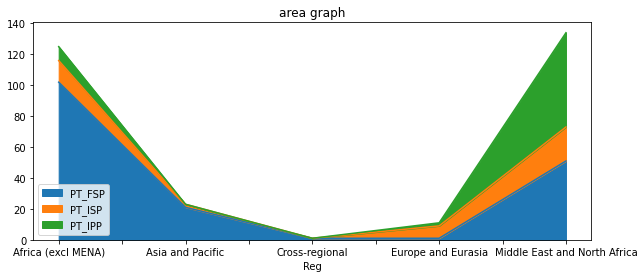

In [12]:
data2[["PT_FSP","PT_ISP","PT_IPP"]].plot(kind='area',stacked=True, figsize=(10, 4))
plt.title("area graph")

We could see different properties sum of agreements in differnt regions, we could tell the quantitative relations between them.
However, only sum is not enough for me to see the relationship, so I need to put the proportion of these three properties behind the table, because they have different agreements I can't tell whether they prefer to one process or just because the whole number is big. 

In [13]:
data2.eval("""PT1percentage = PT_FSP/Agreement
              PT2percentage = PT_ISP/Agreement
              PT3percentage = PT_IPP/Agreement
           """,inplace=True)


In [14]:
region_data = data2
region_data

,PT_FSP,PT_ISP,PT_IPP,Agreement,PT1percentage,PT2percentage,PT3percentage
Reg,,,,,,,
Africa (excl MENA),102,14,9,116,0.879310,0.120690,0.077586
Asia and Pacific,21,2,0,23,0.913043,0.086957,0.000000
Cross-regional,1,0,0,1,1.000000,0.000000,0.000000
Europe and Eurasia,1,8,2,12,0.083333,0.666667,0.166667
Middle East and North Africa,51,22,61,134,0.380597,0.164179,0.455224


Text(0.5, 1.0, 'Stacked bars on different regions ')

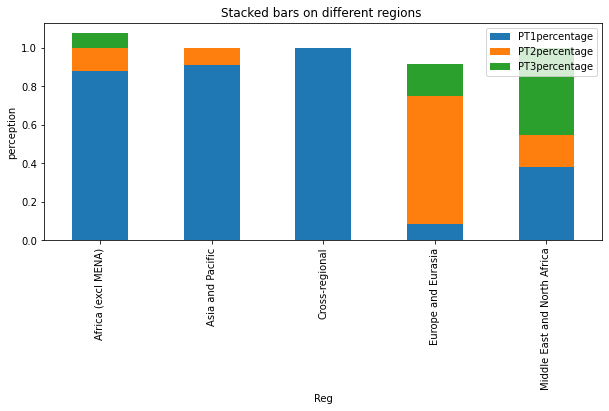

In [15]:
region_data[["PT1percentage","PT2percentage","PT3percentage"]].plot(kind='bar',stacked = True, figsize=(10, 4))
plt.ylabel("perception")
plt.title("Stacked bars on different regions ")

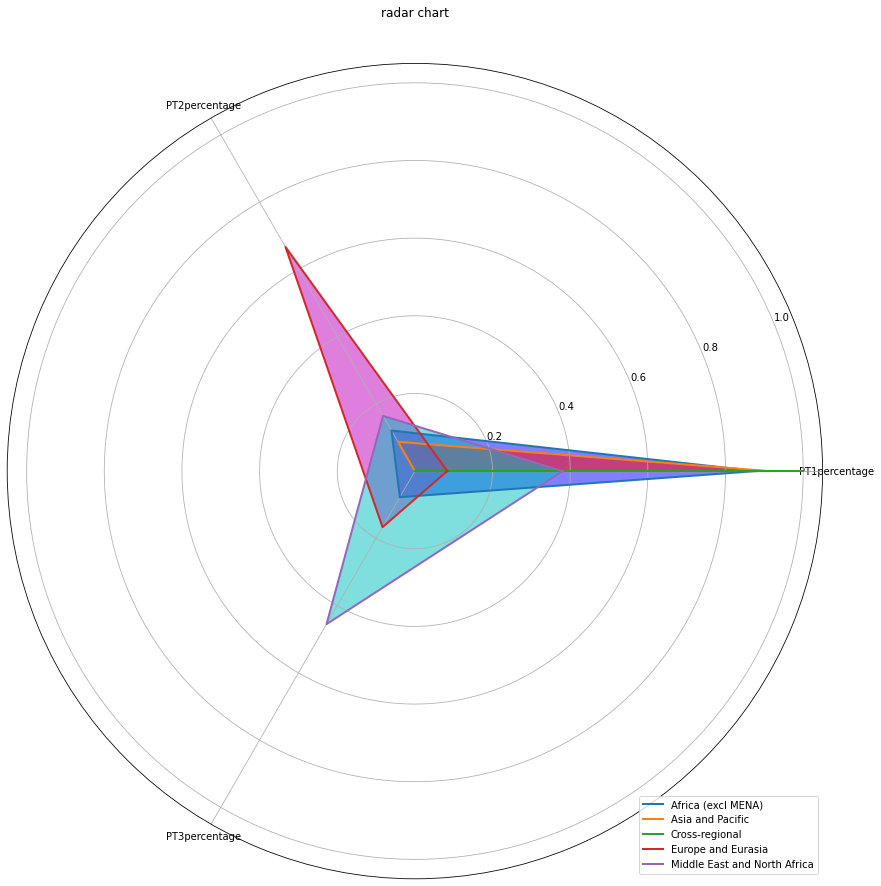

In [16]:
labels = ["PT1percentage","PT2percentage","PT3percentage"]
kinds = ["Africa (excl MENA)","Asia and Pacific","Cross-regional","Europe and Eurasia","Middle East and North Africa"]
data11 = region_data[["PT1percentage","PT2percentage","PT3percentage"]]

result = pd.concat([data11, data11[["PT1percentage"]]], axis=1)
centers = np.array(result.iloc[:, :])
angle = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)
angle = np.concatenate((angle, [angle[0]]))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, polar=True)    
col = ["b","r","y","m","c"]
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linewidth=2, label=kinds[i])
    ax.fill(angle, centers[i], col[i] ,alpha=0.5)
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title("radar chart")
plt.legend(loc="lower right")
plt.show()

We could see clearly from the bar chart and radar chart that different regions have their different tastes of the process types, for Africa, Asia and Pacific, Cross-region they prefer formal structured process a lot, for Europe and Eurasia, their agreement are more like isolated examples, as for Middle East and North Africa, they prefer informal but persistent practice which means there are many evidences of clear cultures or practices of local peace agreements.

## Relationship between date(year) and properties

For this part I'd like to discover the relationship between the date and properties

In [18]:
data4 = data[["Dat","PT_FSP","PT_ISP","PT_IPP"]]
da = list(data4["Dat"])
f = [i.split("-")[0] for i in da]
data4.drop("Dat",axis=1)

,PT_FSP,PT_ISP,PT_IPP
0,1,0,0
1,0,1,0
2,0,0,0
3,0,0,1
4,0,0,1
...,...,...,...
281,1,0,0
282,0,0,1
283,1,0,0
284,0,1,0


In [19]:
data4.insert(0,"Date",[i for i in f])
data4

,Date,Dat,PT_FSP,PT_ISP,PT_IPP
0,1997,1997-02-12,1,0,0
1,1995,1995-07-24,0,1,0
2,1994,1994-03-04,0,0,0
3,1993,1993-10-22,0,0,1
4,1993,1993-10-21,0,0,1
...,...,...,...,...,...
281,2014,2014-02-09,1,0,0
282,2014,2014-02-04,0,0,1
283,2014,2014-01-20,1,0,0
284,2014,2014-01-11,0,1,0


In [20]:
year_data = data4.groupby(["Date"]).sum()
data5 = data4.groupby(["Date"]).count()
e = list(data5["PT_FSP"])
print(e)
year_data.insert(3,"Agreement",[i for i in e])

[2, 4, 5, 1, 1, 2, 3, 1, 2, 1, 1, 3, 10, 9, 15, 3, 4, 5, 8, 29, 23, 37, 44, 48, 23, 2]


As the same as we did to the region part before, we need to calculate the proportion.

In [21]:
year_data.eval("""PT1percentage = PT_FSP/Agreement
              PT2percentage = PT_ISP/Agreement
              PT3percentage = PT_IPP/Agreement
           """,inplace=True)
year_data.index

Index(['1991', '1992', '1993', '1994', '1995', '1997', '1999', '2000', '2002',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object', name='Date')

We could find some specific years don't have any agreements, in order to generate a smooth timeline, we need to add these years with "0" for the value.

In [22]:
year_data.loc['1996']=[0,0,0,0,0.000000,0.000000,0.000000]
year_data.loc['1998']=[0,0,0,0,0.000000,0.000000,0.000000]
year_data.loc['2001']=[0,0,0,0,0.000000,0.000000,0.000000]
year_data.loc['2003']=[0,0,0,0,0.000000,0.000000,0.000000]
year_data.iloc[0:,0]
print(year_data.reset_index())
new_yeardata = year_data.sort_values(by =["Date"])

    Date  PT_FSP  PT_ISP  PT_IPP  Agreement  PT1percentage  PT2percentage  \
0   1991     0.0     2.0     0.0        2.0       0.000000       1.000000   
1   1992     0.0     4.0     0.0        4.0       0.000000       1.000000   
2   1993     0.0     1.0     4.0        5.0       0.000000       0.200000   
3   1994     0.0     0.0     0.0        1.0       0.000000       0.000000   
4   1995     0.0     1.0     0.0        1.0       0.000000       1.000000   
5   1997     2.0     0.0     0.0        2.0       1.000000       0.000000   
6   1999     3.0     0.0     0.0        3.0       1.000000       0.000000   
7   2000     1.0     0.0     0.0        1.0       1.000000       0.000000   
8   2002     2.0     0.0     0.0        2.0       1.000000       0.000000   
9   2004     1.0     0.0     0.0        1.0       1.000000       0.000000   
10  2005     0.0     0.0     1.0        1.0       0.000000       0.000000   
11  2006     3.0     0.0     0.0        3.0       1.000000       0.000000   

In [23]:
new_yeardata

,PT_FSP,PT_ISP,PT_IPP,Agreement,PT1percentage,PT2percentage,PT3percentage
Date,,,,,,,
1991,0.0,2.0,0.0,2.0,0.000000,1.000000,0.000000
1992,0.0,4.0,0.0,4.0,0.000000,1.000000,0.000000
1993,0.0,1.0,4.0,5.0,0.000000,0.200000,0.800000
1994,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000000
1995,0.0,1.0,0.0,1.0,0.000000,1.000000,0.000000
1996,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1997,2.0,0.0,0.0,2.0,1.000000,0.000000,0.000000
1998,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1999,3.0,0.0,0.0,3.0,1.000000,0.000000,0.000000


Then I will generate the line chart of the number of agreements with different process types and the proportion of it in the order of years.

Text(0.5, 1.0, 'line chart')

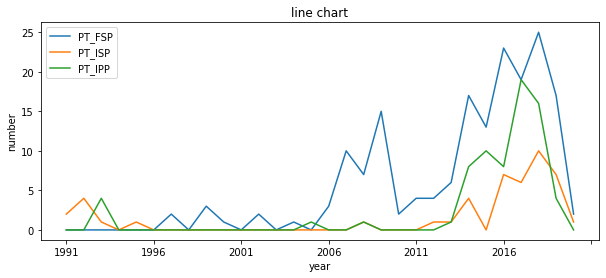

In [24]:
new_yeardata[['PT_FSP',"PT_ISP","PT_IPP"]].plot(kind='line',figsize=(10, 4))
plt.ylabel("number")
plt.xlabel("year")
plt.title("line chart")

We could see the number of these three properties shows an increase from 1991 to 2019(we assume the data of 2020 is not completed) 

Text(0.5, 1.0, 'line chart')

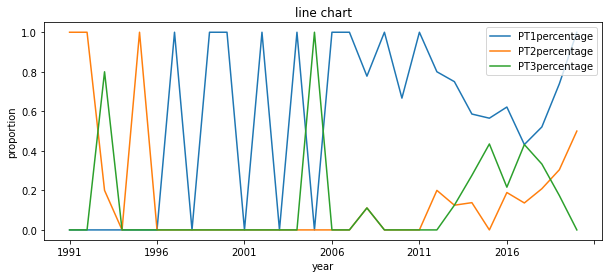

In [25]:
new_yeardata[["PT1percentage","PT2percentage","PT3percentage"]].plot(kind='line', figsize=(10, 4))
plt.ylabel("proportion")
plt.xlabel("year")
plt.title("line chart")

This line chart shows the proportion during these years, it's very funny to see that the agreements all have one process type in some specific years. However, after 2007, this phenomenon tends to be rare. 

## Reflect and hypothesise

### Reflection

The process types include Formal structured process, Isolated example and Informal but persistent practice, which are put in the local agreement properties part of the data. I think the process types agreements have might be related to the political and military situation, and in this data I could analyze them with time and regions which might reflect the situation. So I also divide my code into two main parts to figure out these relationship with time and regions and I made 5 graphs about process types with them. 

In Relationship between regions and properties part. I could see the different properties sum of agreements in different regions, and I could tell the quantitative relations between them. And different regions have their different tastes of the process types, for Africa, Asia and Pacific, Cross-region they prefer formal structured process a lot, for Europe and Eurasia, their agreement are more like isolated examples, as for Middle East and North Africa, they prefer informal but persistent practice which means there are many evidences of clear cultures or practices of local peace agreements. I also could figure the structure of it with radar map.

As for Relationship between date(year) and properties part I could see the increase on the number of agreements with these three process types in recent years. And the phenomenon that the agreements all have one process type in some specific years early became rare after 2007. In fact, it is an interesting thing and I think the reasons are so complicated, that I can't tell right now.

### Hypothesis

1.1 Fisrt hypothesis: In Middle East and North Africa informal but persistent practice process type appears a lot, which means there are lot of evidence of a clear culture or practice of local peace agreement. I think it might be related to the conflict types they have. Maybe there are many cultural conflicts there?

1.2 How I could go about testing it: Maybe I will check the conflict types on the websites and ask the data holder about this question.

2.1 Second hypothesis: In Europe and Eurasia, many agreements are isolated cases, and we could see from 1991 to 1996 and after 2016, the number of agreements which are isolated cases are high. So I would like to explore if the reasons are in Europe and Eurasia during these period, and why.

2.2 How I could go about testing it: I think I could check each data point individually, and search some information about it.

3.1 Third hypothesis: We could find the number of the whole agreements peaked at 2018, and we might have some important conflicts at that time. 

3.2 How I could go about testing it: I check the news at that time and I see the information that the U.S. moves its embassy in Israel to Jerusalem, and The United States announced in December that it had begun its withdrawal from Syria in 2018. I think many agreements are related to these news. And for further study, I think I could check each data point individually and ask about it to the data holder.